In [4]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import model_selection
%matplotlib inline
from IPython.display import Image  
from sklearn import tree
import pydotplus 

In [5]:
weather = pd.read_csv("C:/MRT/clusters_5/cleaned.csv")
weather.head()

,Unnamed: 0,Date,Time,Station,Get_In_Count,Way_Out_Count,StnPres,Temperature,RH,WS,WD,Precp,W_Station
0,0,2017/1/1,1,市政府,11,0,1014.4,19.9,73.0,0.8,67.0,0.0,C0AC70XinYi
1,1,2017/1/1,6,市政府,677,417,1013.9,19.5,77.0,0.7,102.0,0.0,C0AC70XinYi
2,2,2017/1/1,7,市政府,544,772,1014.7,19.6,75.0,0.5,95.0,0.0,C0AC70XinYi
3,3,2017/1/1,8,市政府,660,1197,1015.3,20.1,73.0,0.6,85.0,0.0,C0AC70XinYi
4,4,2017/1/1,9,市政府,885,2021,1015.3,22.0,66.0,1.3,51.0,0.0,C0AC70XinYi


In [6]:
weather["target"]=weather['Get_In_Count']+weather['Way_Out_Count']
weather_count=weather.drop(['Get_In_Count','Way_Out_Count','W_Station','Unnamed: 0','Date','Station'],axis=1)
weather_count

,Time,StnPres,Temperature,RH,WS,WD,Precp,target
0,1,1014.4,19.9,73.0,0.8,67.0,0.0,11
1,6,1013.9,19.5,77.0,0.7,102.0,0.0,1094
2,7,1014.7,19.6,75.0,0.5,95.0,0.0,1316
3,8,1015.3,20.1,73.0,0.6,85.0,0.0,1857
4,9,1015.3,22.0,66.0,1.3,51.0,0.0,2906
...,...,...,...,...,...,...,...,...
44671,19,1026.6,14.0,88.0,3.0,110.0,0.0,17900
44672,20,1026.5,13.8,87.0,4.3,110.0,0.0,14858
44673,21,1026.3,14.2,82.0,4.1,110.0,0.0,14668
44674,22,1026.3,14.6,81.0,4.0,110.0,0.0,15368


In [8]:
weather_dropna=weather_count.dropna()
weather_dropna

,Time,StnPres,Temperature,RH,WS,WD,Precp,target
0,1,1014.4,19.9,73.0,0.8,67.0,0.0,11
1,6,1013.9,19.5,77.0,0.7,102.0,0.0,1094
2,7,1014.7,19.6,75.0,0.5,95.0,0.0,1316
3,8,1015.3,20.1,73.0,0.6,85.0,0.0,1857
4,9,1015.3,22.0,66.0,1.3,51.0,0.0,2906
...,...,...,...,...,...,...,...,...
44671,19,1026.6,14.0,88.0,3.0,110.0,0.0,17900
44672,20,1026.5,13.8,87.0,4.3,110.0,0.0,14858
44673,21,1026.3,14.2,82.0,4.1,110.0,0.0,14668
44674,22,1026.3,14.6,81.0,4.0,110.0,0.0,15368


In [9]:
X=weather_dropna.iloc[:, 0:7].values
# X=X.to_numpy()
y=weather_dropna.target.values
# y=y.to_numpy()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
print('Variance score: {}'.format(r2_score(y_test, y_pred)))
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

Mean squared error: 6731595.746430929
Variance score: 0.6925895013237122
R2 score: 0.6925895013237122


In [13]:
print(y_pred.shape)
print(y_test.shape)

(12509,)
(12509,)


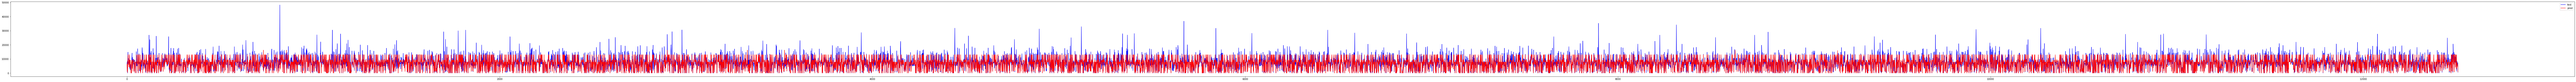

In [18]:
plt.figure(figsize=(200,6))
plt.plot(y_test, label='test',color = 'blue')
plt.plot(y_pred, label='pred', color = 'red')

plt.legend()
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestRegressor(n_estimators = 200, random_state = 0) 
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
print('Variance score: {}'.format(r2_score(y_test, y_pred)))
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

Mean squared error: 5563286.1974982675
Variance score: 0.7459424706008824
R2 score: 0.7459424706008824


In [39]:
print(y_pred[-1000:])

[1.98363200e+04 1.06451500e+03 6.46531000e+03 2.88750000e+01
 1.04840550e+04 4.40000000e-01 7.04684000e+03 2.74600000e+01
 7.23471000e+03 1.58033000e+04 1.03550000e+01 6.50089500e+03
 5.98045000e+03 1.46314000e+03 1.34123500e+04 1.00388000e+04
 8.75967000e+03 1.28595100e+04 7.06505500e+03 7.66560000e+02
 7.60097000e+03 6.71024000e+03 9.24594500e+03 1.00127350e+04
 8.16573500e+03 9.64333500e+03 5.97032500e+03 1.29439100e+04
 8.82987000e+03 7.44161500e+03 7.41914000e+03 2.26000000e+00
 1.42349850e+04 5.89657500e+03 8.84173500e+03 6.94791000e+03
 7.52008500e+03 7.80638500e+03 4.68050000e+01 8.35128000e+03
 1.69587650e+04 1.05067400e+04 7.56762500e+03 1.54390700e+04
 1.15407000e+03 2.03304000e+03 1.10541750e+04 1.05910300e+04
 1.20962000e+03 1.66200000e+01 3.96750000e+03 1.15418000e+03
 7.57097500e+03 1.59850000e+04 5.83548000e+03 5.07461000e+03
 4.66374000e+03 1.30178000e+04 1.17884500e+03 1.48167500e+03
 7.94516000e+03 8.00429500e+03 5.94122500e+03 8.98779000e+03
 6.23771000e+03 6.966640

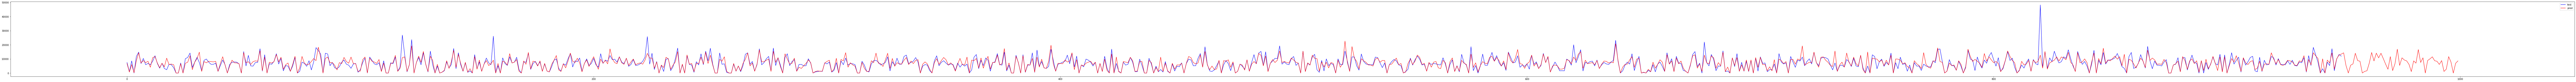

In [42]:

plt.figure(figsize=(200,6))
plt.plot(y_test[:950], label='test',color = 'blue')
plt.plot(y_pred[:1000], label='pred', color = 'red')

plt.legend()
plt.show()

In [32]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1729)
print(X_train.shape, X_test.shape)
#模型引數設定
xlf = xgb.XGBRegressor(max_depth=10, 
learning_rate=0.1, 
n_estimators=100, 
silent=True, 
objective='reg:linear', 
nthread=-1, 
gamma=0,
min_child_weight=1, 
max_delta_step=0, 
subsample=0.85, 
colsample_bytree=0.7, 
colsample_bylevel=1, 
reg_alpha=0, 
reg_lambda=1, 
scale_pos_weight=1, 
seed=1440, 
missing=None)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=100)
# 計算 auc 分數、預測
preds = xlf.predict(X_test)

(41277, 7) (417, 7)
[21:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:7864.16992
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:7348.40967
[2]	validation_0-rmse:6913.28320
[3]	validation_0-rmse:6328.43213
[4]	validation_0-rmse:5802.66309
[5]	validation_0-rmse:5335.02100
[6]	validation_0-rmse:5073.38867
[7]	validation_0-rmse:4699.86182
[8]	validation_0-rmse:4509.79541
[9]	validation_0-rmse:4205.60010
[10]	validation_0-rmse: